# **Histogram**


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-06-11 11:32:22--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  60.8MB/s    in 3.3s    

2025-06-11 11:32:26 (61.1 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [5]:
conn = sqlite3.connect('survey-data.sqlite')

##  Basic SQL queries

** Count the number of rows in the table**


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**List all tables**


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Group data by age**


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


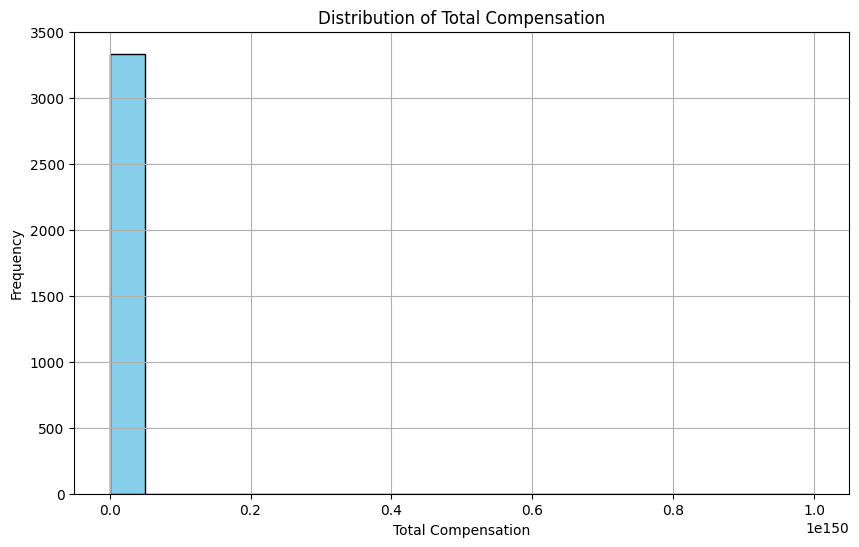

In [9]:
#querying from SQLite Database table
QUERY = """
SELECT CompTotal, COUNT(*) as count
FROM main
GROUP BY CompTotal
ORDER BY CompTotal
"""
df=pd.read_sql_query(QUERY, conn)
# Drop missing or zero values for compensation
comp_data = df['CompTotal'].dropna()
comp_data = comp_data[comp_data > 0]

# Optional: filter out extreme outliers (e.g., top 1%) for readability
comp_data = comp_data[comp_data < comp_data.quantile(0.99)]

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['CompTotal'].dropna(), bins=20, edgecolor='black', color='skyblue')
plt.title('Distribution of Total Compensation')
plt.xlabel('Total Compensation')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


In [10]:
#querying from SQLite Database table
QUERY = """
SELECT YearsCodePro, COUNT(*) as count
FROM main
GROUP BY YearsCodePro
ORDER BY YearsCodePro
"""
df=pd.read_sql_query(QUERY, conn)
# Drop missing or zero values for compensation
YearsCodePro = df['YearsCodePro'].dropna()
YearsCodePro

1                      1
2                     10
3                     11
4                     12
5                     13
6                     14
7                     15
8                     16
9                     17
10                    18
11                    19
12                     2
13                    20
14                    21
15                    22
16                    23
17                    24
18                    25
19                    26
20                    27
21                    28
22                    29
23                     3
24                    30
25                    31
26                    32
27                    33
28                    34
29                    35
30                    36
31                    37
32                    38
33                    39
34                     4
35                    40
36                    41
37                    42
38                    43
39                    44
40                    45


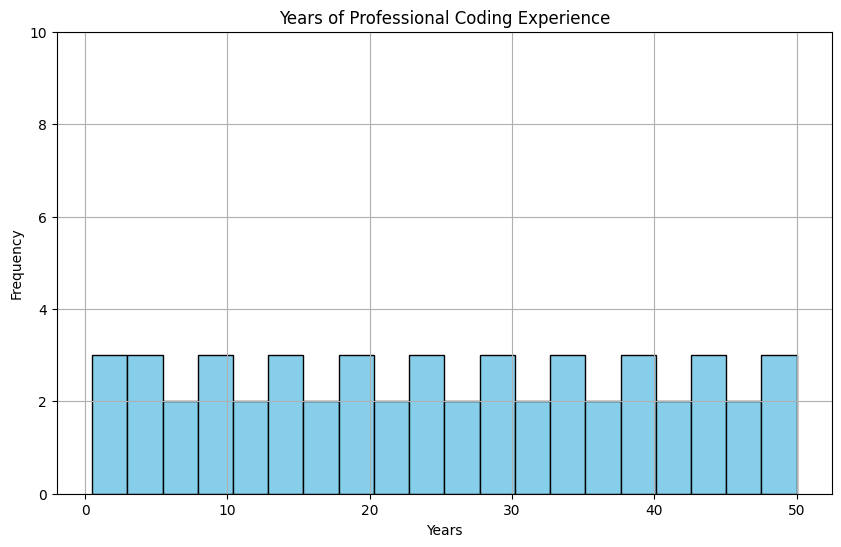

In [11]:
#querying from SQLite Database table
QUERY = """
SELECT YearsCodePro, COUNT(*) as count
FROM main
GROUP BY YearsCodePro
ORDER BY YearsCodePro
"""
df=pd.read_sql_query(QUERY, conn)
# Drop missing or zero values for compensation
YearsCodePro = df['YearsCodePro'].dropna()
# Handle special string cases before converting to numeric
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': '0.5',
    'More than 50 years': '51'
})

df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
# Drop missing and zero or negative values
filtered_years = df['YearsCodePro'].dropna()
filtered_years = filtered_years[filtered_years > 0]

# Optional: filter out extreme outliers (e.g., top 1%) for readability
filtered_years=filtered_years[filtered_years < filtered_years.quantile(0.99)]

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(filtered_years.dropna(), bins=20, edgecolor='black', color='skyblue')
plt.title('Years of Professional Coding Experience')
plt.xlabel('Years')
plt.ylabel('Frequency')
# Set y-axis limits(0,10) 
plt.ylim(0, 10)
plt.grid(True)
plt.show()

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


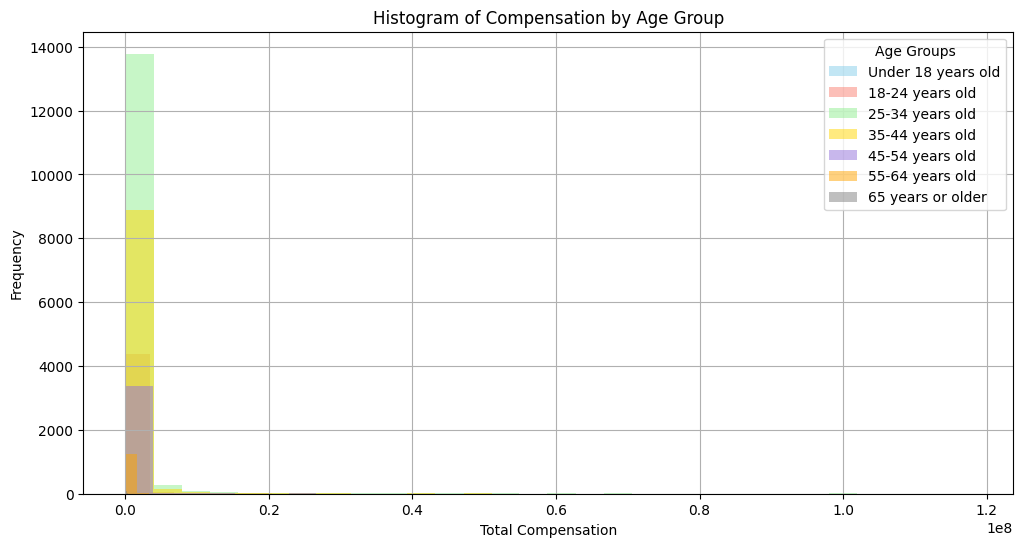

In [12]:
# Query data
QUERY = """
SELECT Age, CompTotal
FROM main
"""
df = pd.read_sql_query(QUERY, conn)

# Drop missing or zero/negative compensation
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df = df.dropna(subset=['Age', 'CompTotal'])
df = df[df['CompTotal'] > 0]

# Optional: Filter out outliers (e.g., top 1%)
df = df[df['CompTotal'] < df['CompTotal'].quantile(0.99)]

import matplotlib.pyplot as plt

# Choose age groups to compare
age_groups = ['Under 18 years old',
               '18-24 years old',
               '25-34 years old',
               '35-44 years old',
               '45-54 years old',
               '55-64 years old',
               '65 years or older',
               ]
colors = ['skyblue', 'salmon', 'lightgreen', 'gold', 'mediumpurple', 'orange', 'gray']

plt.figure(figsize=(12, 6))

# Plot histogram for each age group
for age, color in zip(age_groups, colors):
    subset = df[df['Age'] == age]['CompTotal']
    plt.hist(subset, bins=30, alpha=0.5, label=age, color=color)

plt.xlabel('Total Compensation')
plt.ylabel('Frequency')
plt.title('Histogram of Compensation by Age Group')
plt.legend(title='Age Groups')
plt.grid(True)
plt.show()

**2.2 Histogram of Job Satisfaction for Different Age Groups**


Objective: Use histograms to explore the distribution of `JobSat` (Job Satisfaction') for respondents across different age groups.


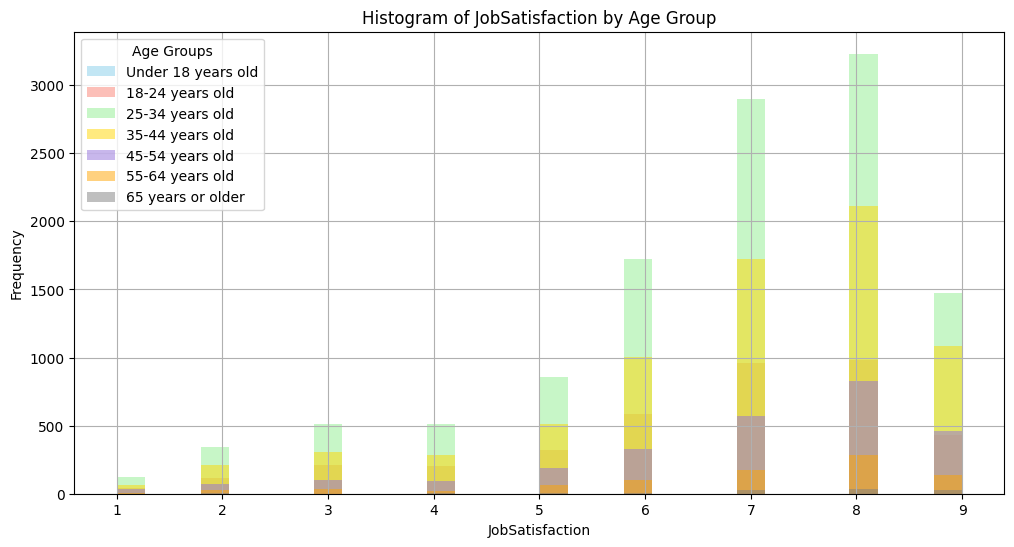

In [13]:
# Query data
QUERY = """
SELECT Age, JobSat
FROM main
"""
df = pd.read_sql_query(QUERY, conn)

# Drop missing or zero/negative compensation
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')
df = df.dropna(subset=['Age', 'JobSat'])
df = df[df['JobSat'] > 0]

# Optional: Filter out outliers (e.g., top 1%)
df = df[df['JobSat'] < df['JobSat'].quantile(0.99)]

# Choose age groups to compare
age_groups = ['Under 18 years old',
               '18-24 years old',
               '25-34 years old',
               '35-44 years old',
               '45-54 years old',
               '55-64 years old',
               '65 years or older',
               ]
colors = ['skyblue', 'salmon', 'lightgreen', 'gold', 'mediumpurple', 'orange', 'gray']
plt.figure(figsize=(12, 6))

# Plot histogram for each age group
for age, color in zip(age_groups, colors):
    subset = df[df['Age'] == age]['JobSat']
    plt.hist(subset, bins=30, alpha=0.5, label=age, color=color)

plt.xlabel('JobSatisfaction')
plt.ylabel('Frequency')
plt.title('Histogram of JobSatisfaction by Age Group')
plt.legend(title='Age Groups')
plt.grid(True)
plt.show()

### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


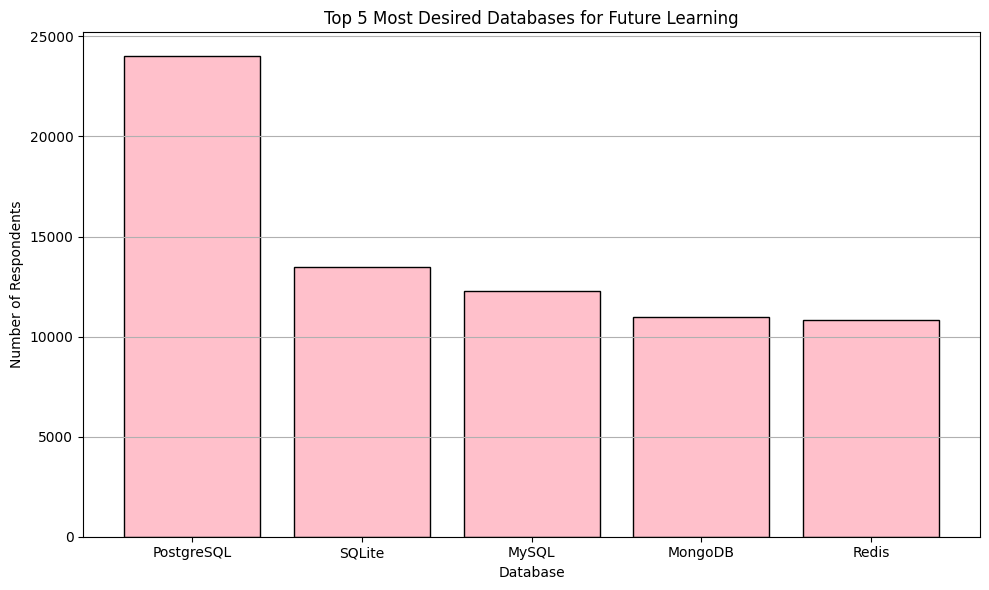

In [32]:
QUERY = """
SELECT DatabaseWantToWorkWith
FROM main
"""
df = pd.read_sql_query(QUERY, conn)

# Drop missing values
df = df.dropna(subset=['DatabaseWantToWorkWith'])

# Step 3: Split by colon and explode into separate rows
df['DatabaseWantToWorkWith'] = df['DatabaseWantToWorkWith'].str.split(';')
df_exploded = df.explode('DatabaseWantToWorkWith')

# Step 4: Clean whitespace and count frequencies
df_exploded['DatabaseWantToWorkWith'] = df_exploded['DatabaseWantToWorkWith'].str.strip()
db_counts = df_exploded['DatabaseWantToWorkWith'].value_counts()

# Step 5: Plot (top 10 most desired databases)
top_dbs = db_counts.head(5)
top_dbs

# Plot histogram as a bar chart
plt.figure(figsize=(10,6))
plt.bar(top_dbs.index, top_dbs.values, color='pink', edgecolor='black')
plt.xlabel('Database')
plt.ylabel('Number of Respondents')
plt.title('Top 5 Most Desired Databases for Future Learning')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


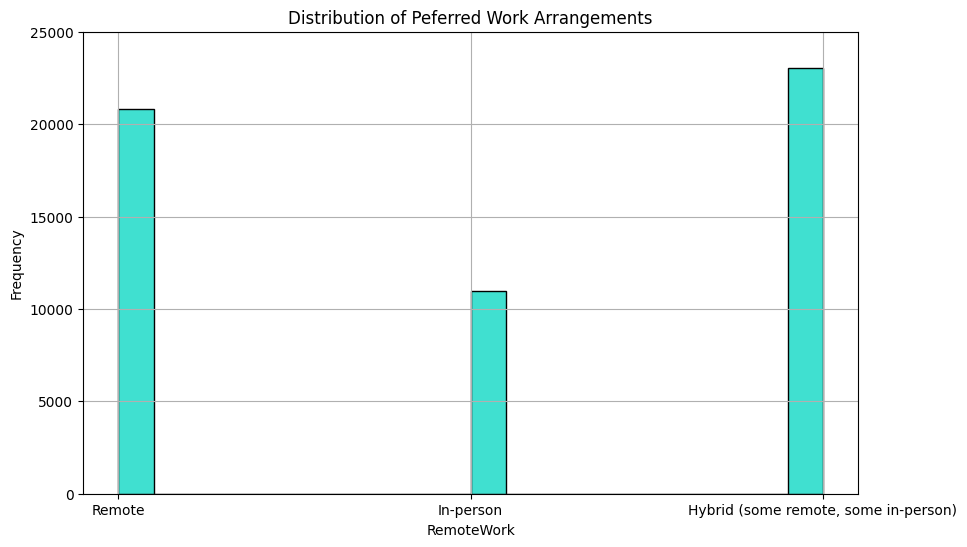

In [20]:
#querying from SQLite Database table
QUERY = """
SELECT RemoteWork
FROM main

"""
df=pd.read_sql_query(QUERY, conn)
# Drop missing or zero values for compensation
comp_data = df['RemoteWork'].dropna()


# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['RemoteWork'].dropna(), bins=20, edgecolor='black', color='turquoise')
plt.title('Distribution of Peferred Work Arrangements')
plt.xlabel('RemoteWork')
plt.ylabel('Frequency')
plt.ylim([0, 25000])  # Set y-axis limit
plt.grid(True)
plt.show()

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


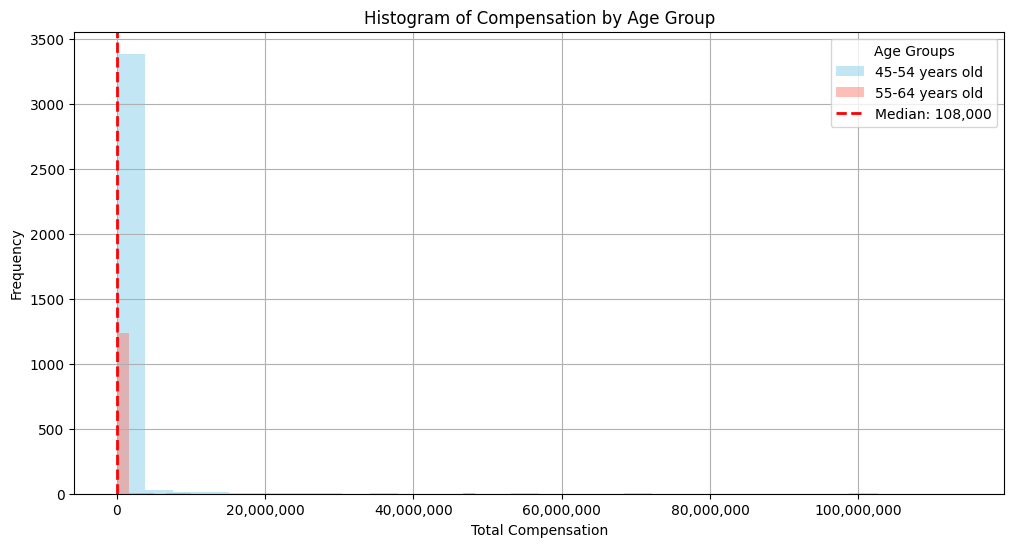

In [40]:
# Query data
QUERY = """
SELECT Age, CompTotal
FROM main
"""
df = pd.read_sql_query(QUERY, conn)

# Drop missing or zero/negative compensation
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df = df.dropna(subset=['Age', 'CompTotal'])
df = df[df['CompTotal'] > 0]

#  Filter out outliers (e.g., top 1%)
df = df[df['CompTotal'] < df['CompTotal'].quantile(0.99)]
# Compute median
median_value = df['CompTotal'].median()

import matplotlib.pyplot as plt

# Choose age groups to compare
age_groups = [
               '45-54 years old',
               '55-64 years old'

               ]
colors = ['skyblue', 'salmon']

plt.figure(figsize=(12, 6))
# Plot histogram for each age group
for age, color in zip(age_groups, colors):
    subset = df[df['Age'] == age]['CompTotal']
    plt.hist(subset, bins=30, alpha=0.5, label=age, color=color)
    # Format x-axis ticks to show commas instead of scientific notation
import matplotlib.ticker as ticker
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.axvline(median_value, color='red', linestyle='dashed', linewidth=2, label=f'Median: {int(median_value):,}')
plt.xlabel('Total Compensation')
plt.ylabel('Frequency')
plt.title('Histogram of Compensation by Age Group')
plt.legend(title='Age Groups')
plt.grid(True)
plt.show()



**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


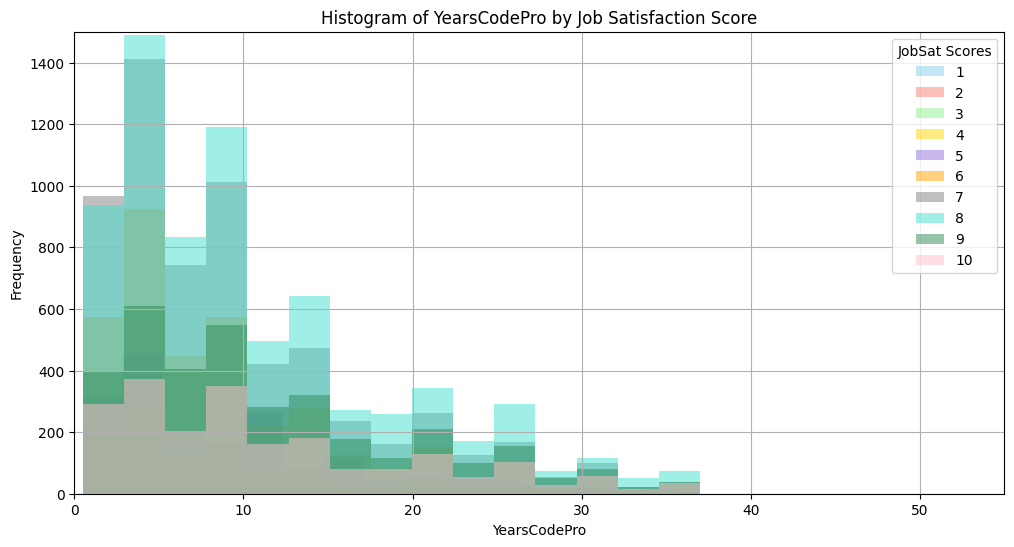

In [80]:
#Query relevant columns
query = """
SELECT JobSat, YearsCodePro
FROM main
"""
df = pd.read_sql_query(query, conn)

# Step 2: Drop missing values
df = df.dropna(subset=['JobSat', 'YearsCodePro'])

# Step 3: Convert YearsCodePro to numeric (handle 'Less than 1 year' and 'More than 50 years')
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': '0.5',
    'More than 50 years': '51'
})

# Convert JobSat to int and YearsCodePro to numeric (float or int as you want)
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce').round().astype(int)
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Step 4:  filter out extreme outliers
df = df[(df['YearsCodePro'] < df['YearsCodePro'].quantile(0.99)) & (df['JobSat'] <= 10)]


# Choose age groups to compare
score_groups = list(range(1, 11))  # integers from 1 to 10
colors = ['skyblue', 'salmon', 'lightgreen', 'gold', 'mediumpurple', 'orange', 'gray','turquoise','seagreen','pink']
plt.figure(figsize=(12, 6))

# Plot histogram for each age group
for score, color in zip(score_groups, colors):
    subset = df[df['JobSat'] == score]['YearsCodePro']
    plt.hist(subset, bins=15, alpha=0.5, label=score, color=color)

plt.xlabel('YearsCodePro')
plt.ylabel('Frequency')
plt.title('Histogram of YearsCodePro by Job Satisfaction Score')
plt.legend(title='JobSat Scores')
plt.xlim(0,55)
plt.ylim(0,1500)
plt.grid(True)
plt.show()

### Final step: Close the database connection


In [81]:
conn.close()